In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Files
teams_path = 'Resources/MTeams.csv'
rankings_path = 'Resources/MMasseyOrdinals_thruDay128.csv'
results_path = 'Resources/MRegularSeasonDetailedResults.csv'
sample_path = 'Resources/MSampleSubmissionStage2.csv'

In [3]:
# Teams raw DF
teams_df=pd.read_csv(teams_path)
print(teams_df.shape)
teams_df.head()

(372, 4)


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2022
1,1102,Air Force,1985,2022
2,1103,Akron,1985,2022
3,1104,Alabama,1985,2022
4,1105,Alabama A&M,2000,2022


In [4]:
# Rankings raw DF
rankings_df=pd.read_csv(rankings_path)
print(rankings_df.shape)
rankings_df.head()

(4601850, 5)


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


In [5]:
# Checking ranking systems
rankings_df['SystemName'].value_counts()

SAG    123479
MOR    122489
POM    119998
DOK    106702
WLK     98479
        ...  
HRN       351
CRW       351
PMC       351
BP5       345
PH        326
Name: SystemName, Length: 187, dtype: int64

In [6]:
# We need to get just SAG ranks for simplicity
SAG_ranks = rankings_df.loc[rankings_df['SystemName']=='SAG']
SAG_ranks.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
3622,2003,37,SAG,1102,114
3623,2003,37,SAG,1103,193
3624,2003,37,SAG,1104,11
3625,2003,37,SAG,1105,310
3626,2003,37,SAG,1106,257


In [7]:
# This is good for now - but we'll need to look up the OrdinalRank by TeamID and 
# load that into Results for the DayNum (results) corresponding to RankingDayNum

In [8]:
# Results raw DF
raw_results_df=pd.read_csv(results_path)
print(raw_results_df.shape)
raw_results_df.head()

(102032, 34)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [9]:
raw_results_df.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

In [10]:
# We want to drop years before 2003, because rankings go to 2003
results_df = raw_results_df[raw_results_df['Season']>=2003]
results_df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [11]:
# Make a new column in SAG_Ranks called 'Season_Day_Team' that we will repeat in Results 

SAG_ranks['Season-Day-Team'] = SAG_ranks['Season'].map(str) + '-' + SAG_ranks['RankingDayNum'].map(str) + '-' + SAG_ranks['TeamID'].map(str)
SAG_ranks.head()

/Users/shane/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank,Season-Day-Team
3622,2003,37,SAG,1102,114,2003-37-1102
3623,2003,37,SAG,1103,193,2003-37-1103
3624,2003,37,SAG,1104,11,2003-37-1104
3625,2003,37,SAG,1105,310,2003-37-1105
3626,2003,37,SAG,1106,257,2003-37-1106


In [12]:
# Make new columns in SAG_Ranks called 'RankingWeek' and 'Season_Week_Team' because rankings only come out weekly

SAG_ranks['RankingWeek'] = (SAG_ranks['RankingDayNum']/7).apply(np.ceil)

SAG_ranks['Season-Week-Team'] = SAG_ranks['Season'].map(str) + '-' + SAG_ranks['RankingWeek'].map(str) + '-' + SAG_ranks['TeamID'].map(str)
SAG_ranks.head()

/Users/shane/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shane/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank,Season-Day-Team,RankingWeek,Season-Week-Team
3622,2003,37,SAG,1102,114,2003-37-1102,6.0,2003-6.0-1102
3623,2003,37,SAG,1103,193,2003-37-1103,6.0,2003-6.0-1103
3624,2003,37,SAG,1104,11,2003-37-1104,6.0,2003-6.0-1104
3625,2003,37,SAG,1105,310,2003-37-1105,6.0,2003-6.0-1105
3626,2003,37,SAG,1106,257,2003-37-1106,6.0,2003-6.0-1106


In [13]:
# Make a new column in Results called 'WSeason_Day_Team' & 'LSeason_Day_Team' that we'll use for potential indices

results_df['WSeason-Day-Team'] = results_df['Season'].map(str) + '-' + results_df['DayNum'].map(str) + '-' + results_df['WTeamID'].map(str)
results_df['LSeason-Day-Team'] = results_df['Season'].map(str) + '-' + results_df['DayNum'].map(str) + '-' + results_df['LTeamID'].map(str)
results_df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WSeason-Day-Team,LSeason-Day-Team
0,2003,10,1104,68,1328,62,N,0,27,58,...,22,10,22,8,18,9,2,20,2003-10-1104,2003-10-1328
1,2003,10,1272,70,1393,63,N,0,26,62,...,20,20,25,7,12,8,6,16,2003-10-1272,2003-10-1393
2,2003,11,1266,73,1437,61,N,0,24,58,...,23,31,22,9,12,2,5,23,2003-11-1266,2003-11-1437
3,2003,11,1296,56,1457,50,N,0,18,38,...,15,17,20,9,19,4,3,23,2003-11-1296,2003-11-1457
4,2003,11,1400,77,1208,71,N,0,30,61,...,27,21,15,12,10,7,1,14,2003-11-1400,2003-11-1208


In [14]:
# Make a new column in Results called 'WSeason_Week_Team' & 'LSeason_Week_Team' that we'll use for loc to pull in OrdinalRank for winning and losing team

results_df['WeekNum'] = (results_df['DayNum']/7).apply(np.ceil)

results_df['WSeason-Week-Team'] = results_df['Season'].map(str) + '-' + results_df['WeekNum'].map(str) + '-' + results_df['WTeamID'].map(str)
results_df['LSeason-Week-Team'] = results_df['Season'].map(str) + '-' + results_df['WeekNum'].map(str) + '-' + results_df['LTeamID'].map(str)
results_df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LAst,LTO,LStl,LBlk,LPF,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team
0,2003,10,1104,68,1328,62,N,0,27,58,...,8,18,9,2,20,2003-10-1104,2003-10-1328,2.0,2003-2.0-1104,2003-2.0-1328
1,2003,10,1272,70,1393,63,N,0,26,62,...,7,12,8,6,16,2003-10-1272,2003-10-1393,2.0,2003-2.0-1272,2003-2.0-1393
2,2003,11,1266,73,1437,61,N,0,24,58,...,9,12,2,5,23,2003-11-1266,2003-11-1437,2.0,2003-2.0-1266,2003-2.0-1437
3,2003,11,1296,56,1457,50,N,0,18,38,...,9,19,4,3,23,2003-11-1296,2003-11-1457,2.0,2003-2.0-1296,2003-2.0-1457
4,2003,11,1400,77,1208,71,N,0,30,61,...,12,10,7,1,14,2003-11-1400,2003-11-1208,2.0,2003-2.0-1400,2003-2.0-1208


In [15]:
# Get winning and losing team rank for that day in our results df

# # Create empty columns
# results_df['WRank'] = "" 
# results_df['LRank'] = ""
# results_df.head()

In [16]:
# Merging winning team rankings on season-week-team. There will be NA's for Rank bc of beginning and end of season

results_df = results_df.merge(SAG_ranks[['Season-Week-Team','OrdinalRank']], how='left', left_on='WSeason-Week-Team', right_on='Season-Week-Team').drop(columns=['Season-Week-Team'])

results_df.sample(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LTO,LStl,LBlk,LPF,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,OrdinalRank
41002,2010,68,1341,65,1411,60,A,0,23,58,...,20,11,6,20,2010-68-1341,2010-68-1411,10.0,2010-10.0-1341,2010-10.0-1411,272.0
74886,2016,90,1131,75,1250,73,H,0,25,54,...,6,6,7,19,2016-90-1131,2016-90-1250,13.0,2016-13.0-1131,2016-13.0-1250,240.0
58358,2013,89,1334,77,1413,64,H,0,27,56,...,18,4,4,19,2013-89-1334,2013-89-1413,13.0,2013-13.0-1334,2013-13.0-1413,138.0
39199,2010,26,1151,74,1255,70,N,0,25,51,...,15,8,0,20,2010-26-1151,2010-26-1255,4.0,2010-4.0-1151,2010-4.0-1255,265.0
31463,2008,117,1197,68,1445,61,H,0,24,53,...,17,7,2,19,2008-117-1197,2008-117-1445,17.0,2008-17.0-1197,2008-17.0-1445,297.0
52599,2012,85,1356,77,1133,60,H,0,28,47,...,14,9,1,20,2012-85-1356,2012-85-1133,13.0,2012-13.0-1356,2012-13.0-1133,217.0
15761,2006,15,1319,71,1288,51,N,0,24,55,...,20,8,5,24,2006-15-1319,2006-15-1288,3.0,2006-3.0-1319,2006-3.0-1288,217.0
33640,2009,44,1431,96,1403,78,H,0,33,64,...,18,4,0,24,2009-44-1431,2009-44-1403,7.0,2009-7.0-1431,2009-7.0-1403,119.0
69728,2015,98,1288,55,1354,43,H,0,21,60,...,10,2,4,19,2015-98-1288,2015-98-1354,14.0,2015-14.0-1288,2015-14.0-1354,333.0
1687,2003,61,1449,76,1425,72,H,0,25,68,...,17,8,4,26,2003-61-1449,2003-61-1425,9.0,2003-9.0-1449,2003-9.0-1425,97.0


In [17]:
# Rename OrdinalRank to WRank
results_df.rename(columns={'OrdinalRank': 'WRank'},inplace=True)
results_df.sample(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LTO,LStl,LBlk,LPF,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,WRank
60138,2013,129,1368,85,1270,65,N,0,29,52,...,8,4,4,17,2013-129-1368,2013-129-1270,19.0,2013-19.0-1368,2013-19.0-1270,288.0
81629,2017,115,1428,86,1160,81,A,0,26,47,...,10,2,4,24,2017-115-1428,2017-115-1160,17.0,2017-17.0-1428,2017-17.0-1160,51.0
58615,2013,96,1233,78,1351,71,H,0,25,50,...,11,2,10,19,2013-96-1233,2013-96-1351,14.0,2013-14.0-1233,2013-14.0-1351,106.0
92581,2019,110,1142,88,1218,80,H,0,32,60,...,4,4,4,15,2019-110-1142,2019-110-1218,16.0,2019-16.0-1142,2019-16.0-1218,324.0
92273,2019,103,1158,88,1318,79,H,0,30,62,...,14,4,2,18,2019-103-1158,2019-103-1318,15.0,2019-15.0-1158,2019-15.0-1318,120.0
60468,2014,6,1464,75,1184,67,N,0,22,54,...,11,7,0,24,2014-6-1464,2014-6-1184,1.0,2014-1.0-1464,2014-1.0-1184,NaN
23173,2007,75,1279,74,1116,72,H,0,30,69,...,21,8,7,17,2007-75-1279,2007-75-1116,11.0,2007-11.0-1279,2007-11.0-1116,91.0
52577,2012,84,1299,93,1164,92,A,1,34,69,...,13,7,2,16,2012-84-1299,2012-84-1164,12.0,2012-12.0-1299,2012-12.0-1164,288.0
22527,2007,61,1210,87,1384,43,H,0,35,69,...,28,4,3,15,2007-61-1210,2007-61-1384,9.0,2007-9.0-1210,2007-9.0-1384,30.0
44416,2011,19,1140,109,1152,60,H,0,38,82,...,21,6,2,26,2011-19-1140,2011-19-1152,3.0,2011-3.0-1140,2011-3.0-1152,13.0


In [18]:
# Merging losing team rankings on season-week-team. There will be NA's for Rank bc of beginning and end of season

results_df = results_df.merge(SAG_ranks[['Season-Week-Team','OrdinalRank']], how='left', left_on='LSeason-Week-Team', right_on='Season-Week-Team').drop(columns=['Season-Week-Team'])

results_df.sample(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LStl,LBlk,LPF,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,WRank,OrdinalRank
51862,2010,108,1176,62,1114,57,H,0,20,40,...,2,0,24,2010-108-1176,2010-108-1114,16.0,2010-16.0-1176,2010-16.0-1114,188.0,280.0
115494,2021,129,1268,68,1277,57,N,0,21,55,...,7,3,23,2021-129-1268,2021-129-1277,19.0,2021-19.0-1268,2021-19.0-1277,32.0,35.0
18759,2005,124,1451,74,1170,71,A,0,25,50,...,9,3,22,2005-124-1451,2005-124-1170,18.0,2005-18.0-1451,2005-18.0-1170,253.0,268.0
59365,2012,16,1253,86,1338,76,A,0,32,54,...,5,2,20,2012-16-1253,2012-16-1338,3.0,2012-3.0-1253,2012-3.0-1338,116.0,13.0
100343,2019,4,1285,81,1209,74,H,0,24,55,...,11,5,31,2019-4-1285,2019-4-1209,1.0,2019-1.0-1285,2019-1.0-1209,NaN,NaN
106196,2019,131,1463,83,1343,77,H,0,31,61,...,4,1,17,2019-131-1463,2019-131-1343,19.0,2019-19.0-1463,2019-19.0-1343,101.0,182.0
62812,2012,96,1342,69,1144,67,A,0,26,53,...,3,4,18,2012-96-1342,2012-96-1144,14.0,2012-14.0-1342,2012-14.0-1144,275.0,193.0
29089,2007,117,1330,62,1456,57,A,0,18,51,...,2,1,20,2007-117-1330,2007-117-1456,17.0,2007-17.0-1330,2007-17.0-1456,66.0,189.0
114617,2021,110,1451,74,1319,52,H,0,28,59,...,5,0,16,2021-110-1451,2021-110-1319,16.0,2021-16.0-1451,2021-16.0-1319,141.0,300.0
79014,2015,68,1436,71,1392,57,H,0,25,47,...,5,3,20,2015-68-1436,2015-68-1392,10.0,2015-10.0-1436,2015-10.0-1392,178.0,113.0


In [19]:
# Rename OrdinalRank to LRank
results_df.rename(columns={'OrdinalRank': 'LRank'},inplace=True)
results_df.sample(5)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LStl,LBlk,LPF,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,WRank,LRank
89559,2017,36,1143,62,1343,51,N,0,24,56,...,2,2,21,2017-36-1143,2017-36-1343,6.0,2017-6.0-1143,2017-6.0-1343,56.0,101.0
68631,2013,96,1324,88,1355,83,H,0,30,61,...,2,1,12,2013-96-1324,2013-96-1355,14.0,2013-14.0-1324,2013-14.0-1355,175.0,94.0
38742,2008,130,1390,75,1450,68,N,0,24,54,...,7,0,23,2008-130-1390,2008-130-1450,19.0,2008-19.0-1390,2008-19.0-1450,10.0,12.0
97470,2018,82,1462,73,1371,64,A,0,25,58,...,6,4,22,2018-82-1462,2018-82-1371,12.0,2018-12.0-1462,2018-12.0-1371,13.0,24.0
23496,2006,115,1324,78,1381,75,A,0,26,55,...,5,1,24,2006-115-1324,2006-115-1381,17.0,2006-17.0-1324,2006-17.0-1381,265.0,267.0


In [20]:
# Getting ranking differential to use as a variable - negative values are underdog wins
results_df['RankDiff'] = results_df['LRank'] - results_df['WRank']
results_df['RankDiff'] = results_df['RankDiff']

# Getting Score differential just in case
results_df['Spread'] = results_df['WScore'] - results_df['LScore']

# Outcome column for if high rank team (favorite) won
results_df['LowIDWin'] = np.where((results_df['WTeamID'] < results_df['LTeamID']), 1, 0)

results_df.sample(5)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,WSeason-Day-Team,LSeason-Day-Team,WeekNum,WSeason-Week-Team,LSeason-Week-Team,WRank,LRank,RankDiff,Spread,LowIDWin
10441,2004,94,1399,90,1359,83,H,2,34,75,...,2004-94-1399,2004-94-1359,14.0,2004-14.0-1399,2004-14.0-1359,NaN,NaN,NaN,7,0
120551,2022,116,1209,65,1418,58,H,0,23,61,...,2022-116-1209,2022-116-1418,17.0,2022-17.0-1209,2022-17.0-1418,152.0,204.0,52.0,7,1
100551,2019,9,1298,77,1164,58,H,0,27,63,...,2019-9-1298,2019-9-1164,2.0,2019-2.0-1298,2019-2.0-1164,335.0,343.0,8.0,19,0
20083,2006,33,1172,102,1111,69,A,0,34,67,...,2006-33-1172,2006-33-1111,5.0,2006-5.0-1172,2006-5.0-1111,95.0,171.0,76.0,33,0
6066,2004,18,1361,74,1253,44,H,0,25,66,...,2004-18-1361,2004-18-1253,3.0,2004-3.0-1361,2004-3.0-1253,NaN,NaN,NaN,30,0


In [21]:
# Getting shooting percentages

results_df['WFGPct'] = results_df['WFGM'] / results_df ['WFGA']
results_df['LFGPct'] = results_df['LFGM'] / results_df ['LFGA']

results_df['WFG3Pct'] = results_df['WFGM3'] / results_df ['WFGA3']
results_df['LFG3Pct'] = results_df['LFGM3'] / results_df ['LFGA3']

results_df['WFTPct'] = results_df['WFTM'] / results_df ['WFTA']
results_df['LFTPct'] = results_df['LFTM'] / results_df ['LFTA']

results_df.sample(5)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LRank,RankDiff,Spread,LowIDWin,WFGPct,LFGPct,WFG3Pct,LFG3Pct,WFTPct,LFTPct
75306,2014,117,1103,57,1132,47,H,0,23,58,...,200.0,62.0,10,1,0.396552,0.352941,0.466667,0.153846,0.400000,0.692308
118219,2022,70,1332,78,1333,76,A,0,31,68,...,130.0,80.0,2,1,0.455882,0.534483,0.307692,0.125000,0.444444,0.857143
110985,2020,115,1317,78,1198,59,A,0,28,57,...,166.0,65.0,19,0,0.491228,0.407407,0.562500,0.125000,0.812500,0.520000
96508,2018,64,1304,70,1321,55,A,0,24,55,...,50.0,-42.0,15,1,0.436364,0.292308,0.437500,0.285714,0.882353,0.687500
26518,2007,61,1257,66,1421,51,H,0,21,48,...,263.0,173.0,15,1,0.437500,0.304348,0.400000,0.545455,0.666667,0.629630


In [22]:
# Getting differentials between teams for stats

results_df['FGPct_Diff'] = results_df['WFGPct'] - results_df['LFGPct']
results_df['FG3Pct_Diff'] = results_df['WFG3Pct'] - results_df['LFG3Pct']
results_df['FTPct_Diff'] = results_df['WFTPct'] - results_df['LFTPct']
results_df['OR_Diff'] = results_df['WOR'] - results_df['LOR']
results_df['DR_Diff'] = results_df['WDR'] - results_df['LDR']
results_df['Ast_Diff'] = results_df['WAst'] - results_df['LAst']
results_df['TO_Diff'] = results_df['WTO'] - results_df['LTO']
results_df['Stl_Diff'] = results_df['WStl'] - results_df['LStl']
results_df['Blk_Diff'] = results_df['WBlk'] - results_df['LBlk']
results_df['PF_Diff'] = results_df['WPF'] - results_df['LPF']

results_df.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
       'WSeason-Day-Team', 'LSeason-Day-Team', 'WeekNum', 'WSeason-Week-Team',
       'LSeason-Week-Team', 'WRank', 'LRank', 'RankDiff', 'Spread', 'LowIDWin',
       'WFGPct', 'LFGPct', 'WFG3Pct', 'LFG3Pct', 'WFTPct', 'LFTPct',
       'FGPct_Diff', 'FG3Pct_Diff', 'FTPct_Diff', 'OR_Diff', 'DR_Diff',
       'Ast_Diff', 'TO_Diff', 'Stl_Diff', 'Blk_Diff', 'PF_Diff'],
      dtype='object')

In [23]:
# Drop NA's for a nice and pretty DF

clean_results_df = results_df.dropna()

clean_results_df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,FGPct_Diff,FG3Pct_Diff,FTPct_Diff,OR_Diff,DR_Diff,Ast_Diff,TO_Diff,Stl_Diff,Blk_Diff,PF_Diff
792,2003,36,1113,76,1305,63,H,0,25,57,...,0.042045,0.031579,0.323810,-4,4,2,-8,3,-1,-7
793,2003,36,1116,72,1256,60,H,0,25,58,...,0.031034,0.038363,-0.117794,1,-2,4,-7,-1,0,-1
794,2003,36,1130,85,1235,78,A,0,28,57,...,0.108875,0.052632,-0.053350,-10,0,-1,-1,3,-5,3
795,2003,36,1139,75,1133,70,H,0,23,56,...,-0.079082,-0.478469,0.235577,4,-1,-5,-4,3,0,-4
796,2003,36,1143,67,1364,60,H,0,18,42,...,-0.051429,0.076923,0.233333,4,2,-8,-1,2,1,-16


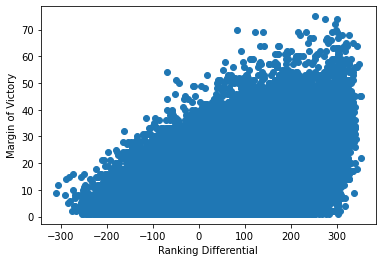

In [24]:
# Look at rank diff and spread

plt.scatter(clean_results_df['RankDiff'],clean_results_df['Spread'])
plt.xlabel('Ranking Differential')
plt.ylabel('Margin of Victory')
plt.show()

In [25]:
# X = ranks, y = win?

y = clean_results_df['LowIDWin']
X = clean_results_df[['RankDiff', 'FGPct_Diff', 'FG3Pct_Diff', 'FTPct_Diff', 'OR_Diff', 'DR_Diff',
       'Ast_Diff', 'TO_Diff', 'Stl_Diff', 'Blk_Diff', 'PF_Diff']]

In [26]:
# Do TTS 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape

(84166, 11)

In [27]:
# Scale X variables with StandardScaler

In [28]:
# Train
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [29]:
# The prediction is that the favorite will win
y_pred = classifier.predict(X_test)
predictions = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
predictions.head(20)

,Prediction,Actual
0,1,0
1,1,1
2,0,0
3,0,0
4,1,1
5,0,1
6,0,1
7,0,0
8,0,1
9,0,0


In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5172868548617051
